In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# TO-DO

- ver si hay de antes de 2012 del s&p 500

- ver si se puede modificar la forma de la graf. Que sea menos alta


In [2]:
bc = pd.read_csv('../../datasets/OtherAssetsCSV/bitcoin.csv') #from 2015, many sources only have from 2014 to present day
sp_500 = pd.read_csv('../../datasets/OtherAssetsCSV/sp_500.csv') #oct 2012 to 2021
au = pd.read_csv('../../datasets/OtherAssetsCSV/gold.csv')# from 2004 to present day
tb_1y = pd.read_csv('../../datasets/OtherAssetsCSV/Bonds1.csv') # 1962 to present
tb_10y = pd.read_csv('../../datasets/OtherAssetsCSV/Bonds10.csv') # 1962 to present
tb_30y = pd.read_csv('../../datasets/OtherAssetsCSV/Bonds30.csv') # 1962 to present
ipc = pd.read_csv('../../datasets/OtherAssetsCSV/ipc_mxx.csv')
euro = pd.read_csv('../../datasets/OtherAssetsCSV/euro_stoxx50.csv')
tb_3m = pd.read_csv('../../datasets/OtherAssetsCSV/Bonds_3_months.csv') # 1934 to present
art = pd.read_csv('../../datasets/clean/clean_mut_art_ver2_ajustado.csv')

In [3]:
#art.fecha.dt.year

In [4]:
#calculate anual return of latam art (diferencia de precio promedio por mes)
art['fecha'] = pd.to_datetime(art['fecha'])
art['year'] = art.fecha.dt.year
art['month'] = art.fecha.dt.month

art['year-month'] = art['year'].astype(str)+'-'+art['month'].astype(str)

art_aggs = art.groupby(by=['year-month', 'year'])['price'].mean().reset_index().sort_values(by='year-month', ascending=False)#by='title', ascending=False).head(30)

art_aggs

art_aggs['past_close'] = art_aggs['price'].shift(-1)
art_aggs['returns'] = ((art_aggs['price']-art_aggs['past_close'])/art_aggs['past_close'])/100
art_aggs

year-month  year         price    past_close   returns
270     2022-9  2022   1537.800000   1681.882353 -0.000857
269     2022-8  2022   1681.882353   7884.324324 -0.007867
268     2022-7  2022   7884.324324  28538.959350 -0.007237
267     2022-6  2022  28538.959350  87733.841808 -0.006747
266     2022-5  2022  87733.841808   4060.576271  0.206063
..         ...   ...           ...           ...       ...
4       1998-7  1998  44533.200000  13052.777778  0.024118
3      1998-12  1998  13052.777778  27766.500000 -0.005299
2      1998-11  1998  27766.500000  24050.285714  0.001545
1      1998-10  1998  24050.285714   2558.000000  0.084020
0       1998-1  1998   2558.000000           NaN       NaN

[271 rows x 5 columns]

In [5]:


## calcular precio promedio por año por autor

#que el return sea el mismo para, 

art.groupby(by=['author', 'year'])['price'].mean()#.sort_values(by='title', ascending=False).head(30)

author            year
 abelardo morell  2001      2358.000000
                  2003     18277.000000
                  2004      5200.000000
                  2005     11192.000000
                  2006     11165.333333
                              ...      
 ángel botello    2004     14990.000000
                  2005     81894.000000
                  2006     74046.000000
                  2007    116261.500000
                  2008     40408.500000
Name: price, Length: 1754, dtype: float64

In [6]:

#EJEMPLO por si alguien quiere quedarse sin

#sp_500['date'] = pd.to_datetime(sp_500['DATE'])
#sp_500['date'].dt.month
#sp_500['year'] = sp_500['date'].dt.year

#start_date = '2012-10-16'
#end_date = '2017-10-16'

#test = sp_500[(sp_500['date'] > start_date) & (sp_500['date'] <= end_date) == True]
#tb_3m[tb_3m['DATE'] == '2015-10-22']
#tb_3m = tb_3m[tb_3m['DTB3'] != '.']

In [7]:
#tb_3m['returns'] = tb_3m['DTB3'].str.replace('\.','')#.astype(float)   #.astype(float)
#tb_3m['int_'] = tb_3m['DTB3'].str.extract('(-?[0-9][0-9]?)\.').astype(float)
#tb_3m['dec'] = tb_3m['DTB3'].str.extract('\.([0-9]?[0-9]?[0-9]?)')#.astype(float)
#tb_3m['dec'] = tb_3m['dec'].replace('0$', '', regex=True)
#tb_3m['dec'] = tb_3m['dec'].replace('^\s*$', np.NaN, regex=True).astype(float)/100
#tb_3m['returns'] = tb_3m['int_']+tb_3m['dec']
#tb_3m['returns'] = tb_3m['returns']

#tb_3m['test'] = tb_3m['DTB3'].replace('', '-', regex=True).astype(float)
#tb_3m['returns'] = tb_3m['test'].str.replace('\.','')#.astype(float)

#tb_3m  #[tb_3m['returns'] != ''].sort_values(by='returns')

In [8]:
sp_500['past_close'] = sp_500[' Close'].shift(-1)
sp_500['returns'] = (sp_500[' Close']-sp_500['past_close'])/sp_500['past_close']

#sp_500.returns.mean()

In [9]:
tb_3m['past_close'] = tb_3m[' Close'].shift(-1)
tb_3m['returns'] = (tb_3m[' Close']-tb_3m['past_close'])/tb_3m['past_close']

In [10]:
euro['past_close'] = euro[' Close'].shift(-1)
euro['return'] = (euro[' Close']-euro['past_close'])/euro['past_close']
#euro.plot.scatter(x='Date', y=' Close')


In [11]:
ipc['past_close'] = ipc['Close'].shift(1)
ipc['return'] = (ipc['Close']-ipc['past_close'])/ipc['past_close']
#ipc.plot.scatter(x='Date', y='Close')

In [12]:
tb_1y['returns'] = tb_1y['returns']/100
tb_3m['returns'] = tb_3m['returns']/100
tb_10y['returns'] = tb_10y['returns']/100
tb_30y['returns'] = tb_30y['returns']/100


In [46]:
sp_500['date'] = pd.to_datetime(sp_500['Date'])
sp_500 = sp_500.rename({'returns': 'sp_500'}, axis=1)[['date', 'sp_500']]

bc['date'] = pd.to_datetime(bc['time'])
bc = bc.rename({'daily_return': 'bc'}, axis=1)[['date', 'bc']]

au['date'] = pd.to_datetime(au['Date'])
au = au.rename({'daily_return': 'au'}, axis=1)[['date', 'au']]

tb_1y['date'] = pd.to_datetime(tb_1y['date'])
tb_1y = tb_1y.rename({'returns': 'tb_1y'}, axis=1)[['date', 'tb_1y']]

tb_10y['date'] = pd.to_datetime(tb_10y['date'])
tb_10y = tb_10y.rename({'returns': 'tb_10y'}, axis=1)[['date', 'tb_10y']]

tb_30y['date'] = pd.to_datetime(tb_30y['date'])
tb_30y = tb_30y.rename({'returns': 'tb_30y'}, axis=1)[['date', 'tb_30y']]

tb_3m['date'] = pd.to_datetime(tb_3m['Date'])
tb_3m = tb_3m.rename({'returns': 'tb_3m'}, axis=1)[['date', 'tb_3m']]

euro['date'] = pd.to_datetime(euro['Date'])
euro = euro.rename({'return': 'euro'}, axis=1)[['date', 'euro']]

ipc['date'] = pd.to_datetime(ipc['Date'])
ipc = ipc.rename({'return': 'ipc'}, axis=1)[['date', 'ipc']]

C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '15/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '16/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '17/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '18/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ern

C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '27/05/1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '31/05/1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '13/06/1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '14/06/1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ern

C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '18/07/1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '19/07/1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '20/07/1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '23/07/1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ern

C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '15/01/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '16/01/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '17/01/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:10: UserWarning: Parsing '18/01/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ern

C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:13: UserWarning: Parsing '17/04/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_10y['date'] = pd.to_datetime(tb_10y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:13: UserWarning: Parsing '18/04/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_10y['date'] = pd.to_datetime(tb_10y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:13: UserWarning: Parsing '19/04/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_10y['date'] = pd.to_datetime(tb_10y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_24804\44728210.py:13: UserWarning: Parsing '23/04/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_10y['date'] = pd.to_datetime(tb_10y['date'])
C:\U

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## cambiar fechas y unificar dfs

## Unir tablas

In [18]:
bc['date'] = pd.to_datetime(bc['time'])
bc = bc.rename({'daily_return': 'bc'}, axis=1)[['date', 'bc']]


In [20]:

au['date'] = pd.to_datetime(au['Date'])
au = au.rename({'daily_return': 'au'}, axis=1)[['date', 'au']]

tb_1y['date'] = pd.to_datetime(tb_1y['date'])
tb_1y = tb_1y.rename({'returns': 'tb_1y'}, axis=1)[['date', 'tb_1y']]

tb_10y['date'] = pd.to_datetime(tb_10y['date'])
tb_10y = tb_10y.rename({'returns': 'tb_10y'}, axis=1)[['date', 'tb_10y']]

tb_30y['date'] = pd.to_datetime(tb_30y['date'])
tb_30y = tb_30y.rename({'returns': 'tb_30y'}, axis=1)[['date', 'tb_30y']]

tb_3m['date'] = pd.to_datetime(tb_3m['Date'])
tb_3m = tb_3m.rename({'returns': 'tb_3m'}, axis=1)[['date', 'tb_3m']]

euro['date'] = pd.to_datetime(euro['Date'])
euro = euro.rename({'return': 'euro'}, axis=1)[['date', 'euro']]

ipc['date'] = pd.to_datetime(ipc['Date'])
ipc = ipc.rename({'return': 'ipc'}, axis=1)[['date', 'ipc']]

C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '15/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '16/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '17/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '18/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ern

C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '30/10/1979' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '31/10/1979' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '13/11/1979' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '14/11/1979' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ern

C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '18/12/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '21/12/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '22/12/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '23/12/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ern

C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '27/03/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '30/03/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '31/03/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_15684\966593074.py:4: UserWarning: Parsing '13/04/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ern

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
#result = pd.concat([sp_500, bc], axis=1, join="inner")
result = sp_500.merge(bc, how='inner', on='date')
result = result.merge(au, how='inner', on='date')
result = result.merge(tb_1y, how='inner', on='date')
result = result.merge(tb_3m, how='inner', on='date')
result = result.merge(tb_10y, how='inner', on='date')
result = result.merge(tb_30y, how='inner', on='date')
result = result.merge(euro, how='inner', on='date')
result = result.merge(ipc, how='inner', on='date')


result['tb_3m'] = result['tb_3m'].fillna(0)

result.iloc[62]   #['tb_3m'].sort_values() #.head(5)

date      2022-06-22 00:00:00
sp_500              -0.001302
bc                  -0.035198
au                   0.003985
tb_1y               -0.000445
tb_3m               -0.000487
tb_10y              -0.000453
tb_30y              -0.000413
euro                -0.008403
ipc                 -0.019957
Name: 62, dtype: object

In [9]:
#sp_500.groupby(by='year').count()

# Intento de hacer los plots de los assets

In [22]:
art_means = art_aggs.returns.mean()*12*100
art_vars = (art_aggs.returns.var()*12)**0.5

art_vars
art_dict = {'index': ['art'], 'returns': [art_means], 'volatility': [art_vars]}
art = pd.DataFrame.from_dict(art_dict)
art

index    returns  volatility
0   art  33.196886    0.293038

In [10]:
#test_var = (test.var()['daily_return']*243)**0.5
#test_mean = test.mean()['daily_return']*243*100

In [23]:
values = result[['sp_500', 'bc', 'au', 'tb_1y', 'tb_3m', 'tb_10y', 'tb_30y', 'euro', 'ipc']]

ret_vars = (values.var()*243)**0.5

ret_means = values.mean()*243*100

returns_df = pd.DataFrame()

returns_df['returns'] = ret_means
returns_df['volatility'] = ret_vars

returns_df.shape[0]

9

In [24]:
values#.head()

sp_500        bc        au     tb_1y     tb_3m    tb_10y    tb_30y  \
0    -0.023663 -0.010354 -0.012459  0.000000  0.000011  0.000000  0.000000   
1     0.025966  0.011627 -0.006924  0.000421  0.000248  0.000153  0.000179   
2    -0.010245 -0.009720 -0.001126  0.000979  0.000021  0.000362  0.000063   
3    -0.002018 -0.009023 -0.005538  0.000101 -0.000030 -0.000197 -0.000219   
4     0.025884  0.030132  0.024310  0.000348 -0.000104  0.000206  0.000393   
...        ...       ...       ...       ...       ...       ...       ...   
1538 -0.010703  0.042287  0.009777 -0.000303  0.001389 -0.000044 -0.000067   
1539 -0.005676 -0.001799 -0.004485 -0.000294  0.000000 -0.000215 -0.000197   
1540 -0.002388  0.002055 -0.005410  0.000000  0.000909 -0.000085 -0.000130   
1541 -0.004262 -0.009571 -0.003122  0.000968 -0.000833 -0.000126 -0.000065   
1542  0.000771       NaN -0.027151  0.000690  0.005652  0.000171  0.000065   

          euro       ipc  
0     0.005749 -0.007070  
1     0.009266  0.001907  
2    -0.004139  0.010488  
3    -0.010550 -0.004360  
4     0.007224  0.017993  
...        ...       ...  
1538 -0.009531 -0.013088  
1539 -0.000259  0.003714  
1540 -0.003394 -0.016097  
1541 -0.010476 -0.003660  
1542  0.004425  0.005353  

[1543 rows x 9 columns]

In [25]:
returns_df

returns  volatility
sp_500   8.982760    0.184344
bc      62.287568    0.666249
au       4.208913    0.135500
tb_1y    0.744967    0.009570
tb_3m    7.504476    0.124863
tb_10y   0.077016    0.004869
tb_30y   0.015566    0.003464
euro    -0.610604    0.199446
ipc      2.238305    0.158577

In [26]:
ret_means

sp_500     8.982760
bc        62.287568
au         4.208913
tb_1y      0.744967
tb_3m      7.504476
tb_10y     0.077016
tb_30y     0.015566
euro      -0.610604
ipc        2.238305
dtype: float64

In [27]:
df = returns_df.reset_index()
df = pd.concat([df, art])

df = df.set_index('index')  #.shape[0]
df = df.reset_index()

ret_means = df['returns']
ret_vars = df['volatility']

In [158]:
# CURVA CON TODOS LOS ASSETS

import numpy as np

num_portfolios = 10000
num_assets = df.shape[0]

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

ind_er = ret_means
cov_matrix = values.cov()

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

ValueError: Unable to coerce to Series, length must be 9: given 10

In [148]:
p_weights

[array([0.20155857, 0.02386331, 0.1489648 , 0.0580975 , 0.01061705,
        0.12678766, 0.15714789, 0.23367258, 0.03929065]),
 array([0.10508513, 0.17676052, 0.11467477, 0.10310127, 0.05041923,
        0.0631327 , 0.14043   , 0.11688631, 0.12951006]),
 array([0.03159017, 0.16482998, 0.10010988, 0.02269254, 0.19291812,
        0.18653531, 0.15527053, 0.1245809 , 0.02147257]),
 array([0.12769159, 0.11395259, 0.1714865 , 0.14069262, 0.09715696,
        0.15136258, 0.01158349, 0.08669448, 0.0993792 ]),
 array([0.0126538 , 0.05438816, 0.17943362, 0.07571696, 0.22673767,
        0.04481312, 0.12008978, 0.15616795, 0.12999894]),
 array([0.11486832, 0.15969101, 0.13558822, 0.09627341, 0.05521842,
        0.01805898, 0.10109663, 0.14084117, 0.17836383]),
 array([0.13788586, 0.08788062, 0.19051501, 0.10784736, 0.17544776,
        0.19503058, 0.01198557, 0.07088304, 0.02252421]),
 array([0.08136867, 0.15697112, 0.13019972, 0.06786286, 0.16284587,
        0.07840342, 0.12000984, 0.06048081, 0.1418

In [144]:
data = {'Returns':p_ret, 'Volatility':p_vol}


for counter, symbol in enumerate(df['index'].unique()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]


portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created
#data['Returns']
portfolios.sort_values(by=['Returns'], ascending = False)

IndexError: index 9 is out of bounds for axis 0 with size 9

In [ ]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

# Experimento usando S&P 500 y bonos de 1 año
- Bitcoin cambia mucho "la forma" de la curva. 

In [28]:
returns_df

returns  volatility
sp_500   8.982760    0.184344
bc      62.287568    0.666249
au       4.208913    0.135500
tb_1y    0.744967    0.009570
tb_3m    7.504476    0.124863
tb_10y   0.077016    0.004869
tb_30y   0.015566    0.003464
euro    -0.610604    0.199446
ipc      2.238305    0.158577

In [60]:
# CURVA CON bonos y s&p 500

import numpy as np

num_portfolios = 10000
num_assets = returns_df.shape[0]-1

p_ret = [] # Defne an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights


ind_er = [8.982760,4.208913,0.744967,7.504476,0.077016, 0.015566, -0.610604, 2.238305 ]
cov_matrix = values[['sp_500', 'au','tb_1y', 'tb_3m', 'tb_10y', 'tb_30y', 'euro', 'ipc']].cov()

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [64]:
df_2 = df.head(1)
df_2 = pd.concat([df.head(1), df.tail(7)])
df_2#.head(1)

index   returns  volatility
0  sp_500  8.982760    0.184344
2      au  4.208913    0.135500
3   tb_1y  0.744967    0.009570
4   tb_3m  7.504476    0.124863
5  tb_10y  0.077016    0.004869
6  tb_30y  0.015566    0.003464
7    euro -0.610604    0.199446
8     ipc  2.238305    0.158577

In [65]:
data = {'Returns':p_ret, 'Volatility':p_vol}


for counter, symbol in enumerate(df_2['index'].unique()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]


portfolios  = pd.DataFrame(data)
portfolios.sort_values(by='Returns', ascending=False).head() # Dataframe of the 10000 portfolios created
#data['Returns']

Returns  Volatility  sp_500 weight  au weight  tb_1y weight  \
3985  6.441769    0.092756       0.381001   0.251810      0.010657   
4697  6.290581    0.084321       0.304733   0.086979      0.100430   
9758  6.004367    0.091569       0.339735   0.056617      0.082646   
5079  5.752311    0.097321       0.337033   0.167416      0.017590   
1774  5.596995    0.093953       0.398535   0.210984      0.147007   

      tb_3m weight  tb_10y weight  tb_30y weight  euro weight  ipc weight  
3985      0.250785       0.050435       0.003181     0.017933    0.034198  
4697      0.407386       0.023805       0.035545     0.013800    0.027320  
9758      0.351304       0.013400       0.055593     0.074034    0.026671  
5079      0.205308       0.041287       0.002798     0.017018    0.211549  
1774      0.111047       0.014060       0.004670     0.024386    0.089310

Returns son tan bajos por tener 

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

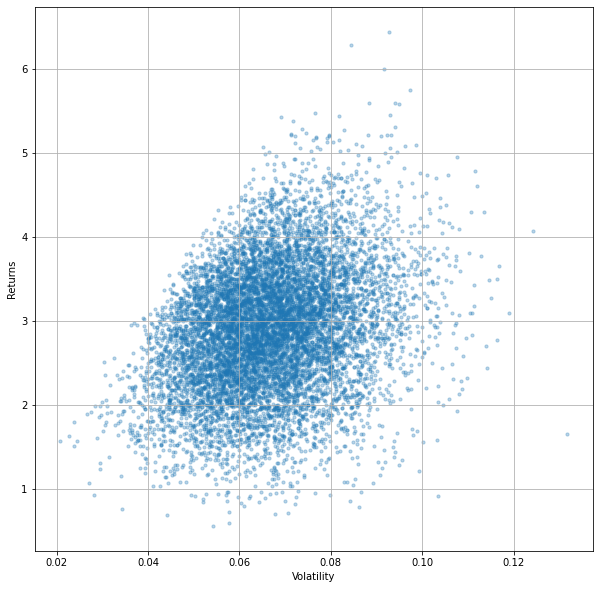

In [66]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])



# Sharpe Ratio

Las escalas parecen estar bien

In [29]:
returns_df.loc['tb_3m']['returns']

7.504476182314265

In [31]:
df

index    returns  volatility
0  sp_500   8.982760    0.184344
1      bc  62.287568    0.666249
2      au   4.208913    0.135500
3   tb_1y   0.744967    0.009570
4   tb_3m   7.504476    0.124863
5  tb_10y   0.077016    0.004869
6  tb_30y   0.015566    0.003464
7    euro  -0.610604    0.199446
8     ipc   2.238305    0.158577
9     art  33.196886    0.293038

In [44]:
df[df['index'] == 'tb_30y'].head(1)['returns']

6    0.015566
Name: returns, dtype: float64

In [56]:
#short term bonds: 4.28 .
#promedio 2015 a 2021
risk_free_ret = 0.015566#df[df['index'] == 'tb_30y'].head(1)['returns']/100#df.loc['tb_30y']['returns']/100

df['sharpe'] = (df['returns']/100 - risk_free_ret/100)/ (df['volatility'])

df

#this time, 30 y asset was the free risk asset

index    returns  volatility    sharpe
0  sp_500   8.982760    0.184344  0.486437
1      bc  62.287568    0.666249  0.934665
2      au   4.208913    0.135500  0.309472
3   tb_1y   0.744967    0.009570  0.762195
4   tb_3m   7.504476    0.124863  0.599768
5  tb_10y   0.077016    0.004869  0.126220
6  tb_30y   0.015566    0.003464 -0.000001
7    euro  -0.610604    0.199446 -0.031395
8     ipc   2.238305    0.158577  0.140168
9     art  33.196886    0.293038  1.132320

In [36]:
df

index    returns  volatility    sharpe
0  sp_500   8.982760    0.184344  0.468490
1      bc  62.287568    0.666249  0.929699
2      au   4.208913    0.135500  0.285056
3   tb_1y   0.744967    0.009570  0.416489
4   tb_3m   7.504476    0.124863  0.573272
5  tb_10y   0.077016    0.004869 -0.553315
6  tb_30y   0.015566    0.003464 -0.955065
7    euro  -0.610604    0.199446 -0.047983
8     ipc   2.238305    0.158577  0.119305
9     art  33.196886    0.293038  1.121030

In [58]:
df.to_csv('./../../datasets/OtherAssetsCSV/assets_results.csv')

<AxesSubplot:xlabel='volatility', ylabel='returns'>

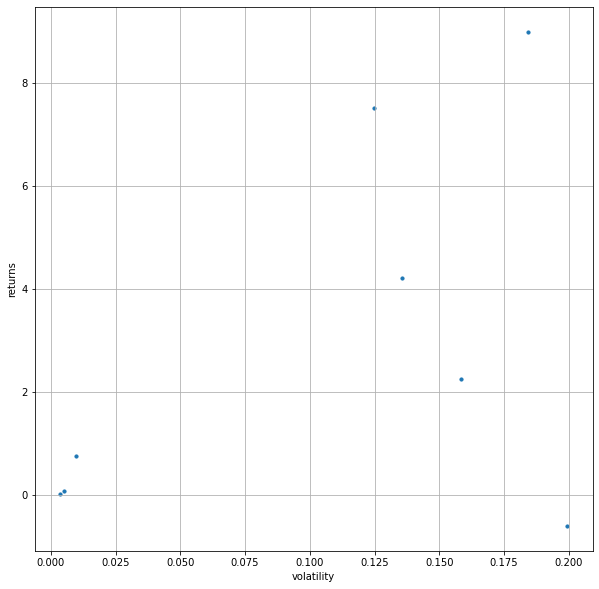

In [74]:
df_2.plot.scatter(x='volatility', y='returns', marker='o', s=10, grid=True, figsize=[10,10])
